Data was downloaded from https://www.kaggle.com/saurav9786/cardiogoodfitness

Column info:

product purchased, TM195, TM498, or TM798; 

gender; 

age, in years;

education, in years; 

relationship status, single or partnered;

annual household income ($);

average number of times the customer plans to use the treadmill each week; 

average number of miles the customer expects to walk/run each week;

self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
df = pd.read_csv("CardioGoodFitness.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [49]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### Univariate Exploration

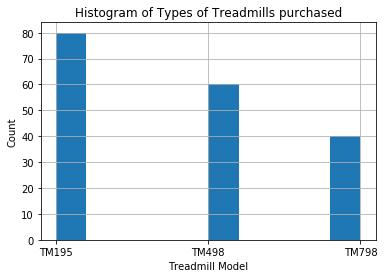

In [50]:
df.Product.hist()
plt.title('Histogram of Types of Treadmills purchased')
plt.xlabel('Treadmill Model')
plt.ylabel('Count');

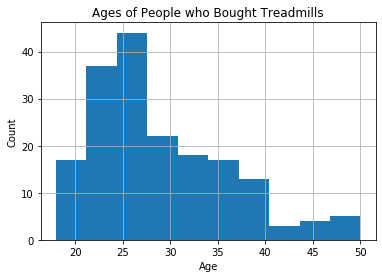

In [51]:
df.Age.hist()
plt.title('Ages of People who Bought Treadmills')
plt.xlabel('Age')
plt.ylabel('Count');

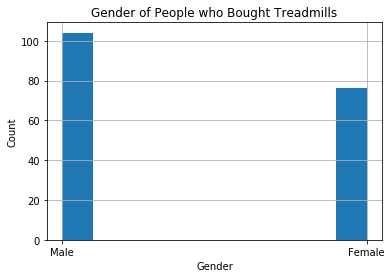

In [52]:
df.Gender.hist()
plt.title('Gender of People who Bought Treadmills')
plt.xlabel('Gender')
plt.ylabel('Count');

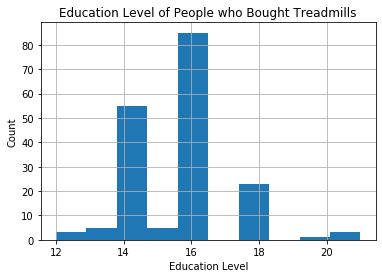

In [53]:
df.Education.hist()
plt.title('Education Level of People who Bought Treadmills')
plt.xlabel('Education Level')
plt.ylabel('Count');

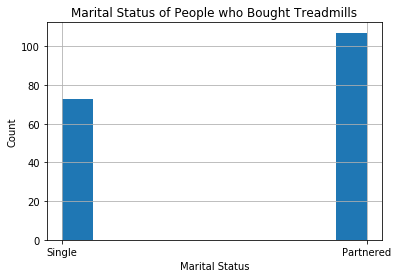

In [54]:
df.MaritalStatus.hist()
plt.title('Marital Status of People who Bought Treadmills')
plt.xlabel('Marital Status')
plt.ylabel('Count');

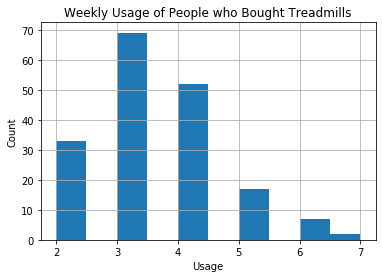

In [55]:
df.Usage.hist()
plt.title('Weekly Usage of People who Bought Treadmills')
plt.xlabel('Usage')
plt.ylabel('Count');

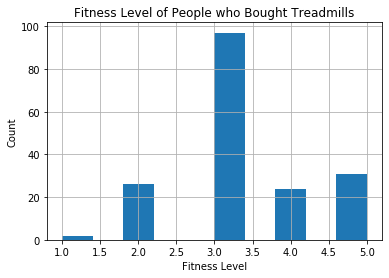

In [56]:
df.Fitness.hist()
plt.title('Fitness Level of People who Bought Treadmills')
plt.xlabel('Fitness Level')
plt.ylabel('Count');

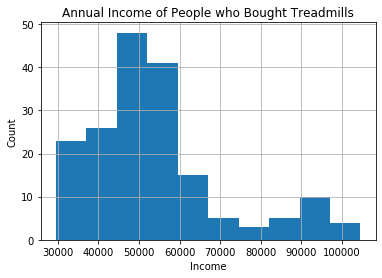

In [57]:
df.Income.hist()
plt.title('Annual Income of People who Bought Treadmills')
plt.xlabel('Income')
plt.ylabel('Count');

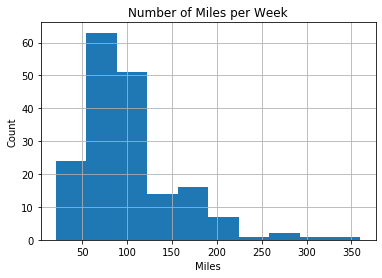

In [58]:
df.Miles.hist()
plt.title('Number of Miles per Week')
plt.xlabel('Miles')
plt.ylabel('Count');

### Multivariate Exploration

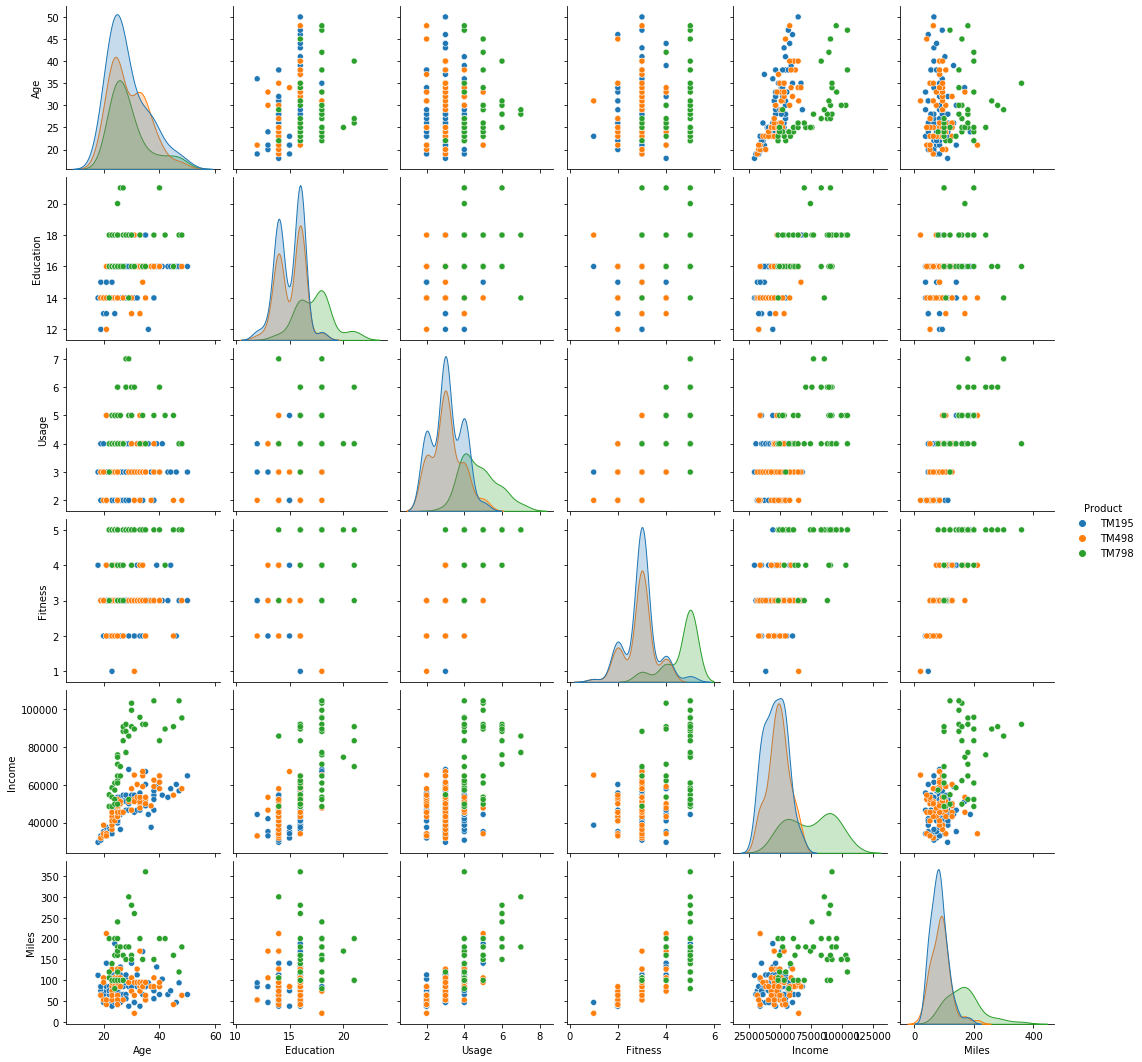

In [59]:
sns.pairplot(df, hue='Product');

### Convert Categorical Variables

In [60]:
product = pd.get_dummies(df['Product'], drop_first=True)
gender=pd.get_dummies(df['Gender'], drop_first=True)
maritalstatus = pd.get_dummies(df['MaritalStatus'], drop_first=True)

In [61]:
#Drop unnecessary columns
df.drop(['Product','Gender','MaritalStatus'],axis=1,inplace=True)

In [64]:
#Want to evaluate TM798
df=pd.concat([df, product, gender, maritalstatus], axis=1)
df=df.drop('TM498', axis=1)
df.head()

,Age,Education,Usage,Fitness,Income,Miles,Male,Single,TM798,Male,Single
0,18,14,3,4,29562,112,1,1,0,1,1
1,19,15,2,3,31836,75,1,1,0,1,1
2,19,14,4,3,30699,66,0,0,0,0,0
3,19,12,3,3,32973,85,1,1,0,1,1
4,20,13,4,2,35247,47,1,0,0,1,0


In [65]:
#Move target to end of dataframe
df['TM798'] = df.pop('TM798')
df.head()

,Age,Education,Usage,Fitness,Income,Miles,Male,Single,Male,Single,TM798
0,18,14,3,4,29562,112,1,1,1,1,0
1,19,15,2,3,31836,75,1,1,1,1,0
2,19,14,4,3,30699,66,0,0,0,0,0
3,19,12,3,3,32973,85,1,1,1,1,0
4,20,13,4,2,35247,47,1,0,1,0,0


### Train Test Split

In [66]:
#Train Test Split on TM798 model
from sklearn.model_selection import train_test_split

In [67]:
X = df[['Age', 'Education','Usage', 'Fitness', 'Income', 'Miles', 'Male', 'Single']]
y = df['TM798']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Train and Fit

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predictions

In [71]:
predictions = logmodel.predict(X_test)

### Evaluations

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.92      1.00      0.96        11

    accuracy                           0.98        54
   macro avg       0.96      0.99      0.97        54
weighted avg       0.98      0.98      0.98        54



### Using K Nearest Neighbors

In [74]:
#Standardize the variables
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

In [76]:
#Fit non target data
scaler.fit(df.drop('TM798', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [77]:
#Center and scale objects
scaled_features = scaler.transform(df.drop('TM798', axis=1))

In [78]:
df_feats = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feats.head()

,Age,Education,Usage,Fitness,Income,Miles,Male,Single,Male,Single
0,-1.558146,-0.974987,-0.421117,0.720443,-1.467585,0.170257,0.854850,1.210683,0.854850,1.210683
1,-1.413725,-0.354854,-1.345520,-0.325362,-1.329438,-0.545143,0.854850,1.210683,0.854850,1.210683
2,-1.413725,-0.974987,0.503286,-0.325362,-1.398512,-0.719159,-1.169795,-0.825980,-1.169795,-0.825980
3,-1.413725,-2.215254,-0.421117,-0.325362,-1.260365,-0.351792,0.854850,1.210683,0.854850,1.210683
4,-1.269303,-1.595120,0.503286,-1.371166,-1.122218,-1.086527,0.854850,-0.825980,0.854850,-0.825980


### Train Test Split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TM798'],
                                                    test_size=0.30, random_state=101 )

### K Nearest Neighbor

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [83]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Predictions

In [84]:
pred = knn.predict(X_test)

### Evaluations

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
print(confusion_matrix(y_test, pred))

[[41  2]
 [ 1 10]]


In [87]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.83      0.91      0.87        11

    accuracy                           0.94        54
   macro avg       0.90      0.93      0.92        54
weighted avg       0.95      0.94      0.95        54



### Choosing a K Value

In [88]:
error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

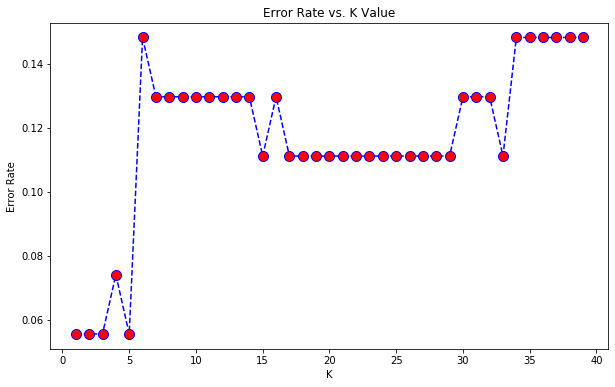

In [89]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [90]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[42  1]
 [ 2  9]]


              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.90      0.82      0.86        11

    accuracy                           0.94        54
   macro avg       0.93      0.90      0.91        54
weighted avg       0.94      0.94      0.94        54



### Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
dtree = DecisionTreeClassifier()

In [93]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Predictions

In [94]:
predictions = dtree.predict(X_test)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix

In [96]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.82      0.82      0.82        11

    accuracy                           0.93        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.93      0.93      0.93        54



In [97]:
print(confusion_matrix(y_test, predictions))

[[41  2]
 [ 2  9]]


In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
rfcpred = rfc.predict(X_test)

In [102]:
print(confusion_matrix(y_test, rfcpred))

[[41  2]
 [ 1 10]]


In [103]:
print(classification_report(y_test, rfcpred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.83      0.91      0.87        11

    accuracy                           0.94        54
   macro avg       0.90      0.93      0.92        54
weighted avg       0.95      0.94      0.95        54

